In [1]:
import os
import numpy as np
import pandas as pd
import glob
import json
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.metrics as metric
import src.utilities.gen_synthetic as gen_synthetic
import statsmodels.api as sm

## Prepare data

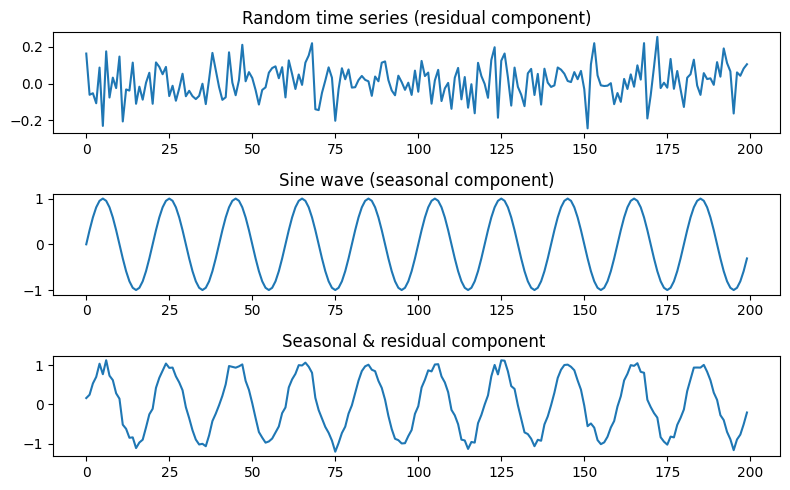

<Figure size 640x480 with 0 Axes>

In [2]:
np.random.seed(1)

season_length = 20
N = 200
residual = 0.1 * np.random.randn(N)
seasonal = gen_synthetic.sinewave(N,season_length,1)
sea_resid = residual + seasonal

fig, axes = plt.subplots(3, 1, figsize=(8, 5))
axes[0].plot(residual, label="syn1")
axes[0].set_title('Random time series (residual component)')
axes[1].plot(seasonal, label="syn2")
axes[1].set_title('Sine wave (seasonal component)')
axes[2].plot(sea_resid, label="syn2")
axes[2].set_title('Seasonal & residual components')
plt.tight_layout()
plt.show()
plt.clf()

## Kruskal–Wallis test

In [6]:
"""

    Kruskal–Wallis test is the second test for stable seasonality [1].
    References
    [1] Bee Dagum, E., Bianconcini, S. (2016). Linear Filters Seasonal Adjustment Methods: Census Method II and Its Variants. In: Seasonal Adjustment Methods and Real Time Trend-Cycle Estimation. Statistics for Social and Behavioral Sciences. Springer, Cham. https://doi.org/10.1007/978-3-319-31822-6_4

"""
random_subcycles = [[residual[i] for i in range(j, len(residual), season_length)] for j in range(season_length)]
sines_subcycles = [[seasonal[i] for i in range(j, len(seasonal), season_length)] for j in range(season_length)]
sinerandom_subcycles = [[sea_resid[i] for i in range(j, len(sea_resid), season_length)] for j in range(season_length)]

ks_random = stats.kruskal(*random_subcycles)
ks_sine = stats.kruskal(*sines_subcycles)
ks_sinerandom = stats.kruskal(*sinerandom_subcycles)

print(f"Kruskal–Wallis test on residual component: {ks_random}")
print(f"Kruskal–Wallis test on seasonal component: {ks_sine}")
print(f"Kruskal–Wallis test on seasonal & residual components: {ks_sinerandom}")

Kruskal–Wallis on residual component: KruskalResult(statistic=26.50758208955233, pvalue=0.11665615701614324)
Kruskal–Wallis on seasonal component: KruskalResult(statistic=198.99999999999997, pvalue=5.381814027491032e-32)
Kruskal–Wallis on seasonal & residual components: KruskalResult(statistic=194.22841791044755, pvalue=4.769208186381349e-31)


## Ljung-Box test

In [7]:
"""
Number of lags to use in the Ljung-Box test is min(2m, n/5), where n is the length of the series, and m is the seasonal period of the data. (Forecasting: Principles and Practice 2nd))
"""
randomness_residual = sm.stats.acorr_ljungbox(residual, lags=[min(2 * season_length, round(len(residual) / 5))], return_df=True)
randomness_seasonal = sm.stats.acorr_ljungbox(seasonal, lags=[min(2 * season_length, round(len(seasonal) / 5))], return_df=True)
randomness_sea_resid = sm.stats.acorr_ljungbox(sea_resid, lags=[min(2 * season_length, round(len(sea_resid) / 5))], return_df=True)

print(f"Ljung-Box test on residual component: {randomness_residual}")
print(f"Ljung-Box test on seasonal component: {randomness_seasonal}")
print(f"Ljung-Box test on seasonal & residual components: {randomness_sea_resid}")

NameError: name 'residual' is not defined